In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 6 # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_

Text(0,0.5,'magnitud')

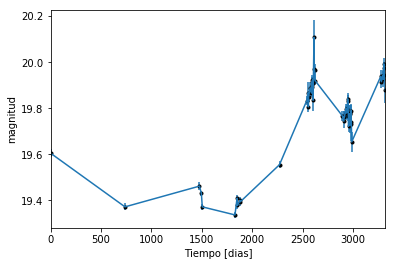

In [2]:
data = np.genfromtxt('LC_G_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=6, q=4)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

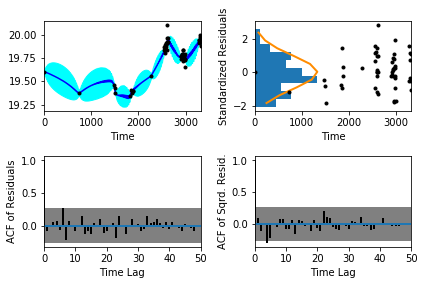

In [5]:
sample.assess_fit()

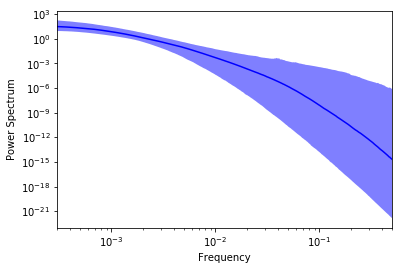

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0736159,'Nivel de ruido')

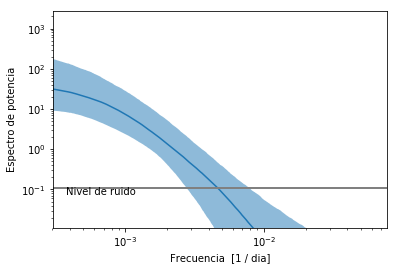

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [9]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [10]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [11]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 555.165348839
Median: 0.0688847626808
Standard deviation: 0.267238486409
68% credibility interval: [ 0.          0.50603479]
95% credibility interval: [ 0.          0.90747688]
99% credibility interval: [ 0.          0.99265487]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 555.165348839
Median: 0.0688847626808
Standard deviation: 0.267238486409
68% credibility interval: [ 0.          0.50603479]
95% credibility interval: [ 0.          0.90747688]
99% credibility interval: [ 0.          0.99265487]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 33959.4180365
Median: 0.0
Standard deviation: 0.0648258193157
68% cred

Plotting parameter summary


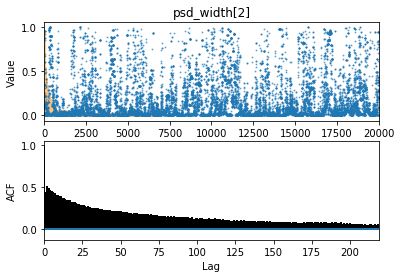

In [12]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [13]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 328.887124219
Median: 106.884192739
Standard deviation: 1.92726257521
68% credibility interval: [ 104.84930329  108.35999392]
95% credibility interval: [ 102.17744648  109.77476498]
99% credibility interval: [ 100.20912488  111.58143965]


In [15]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 7)

In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 245.398342172
Median: 2.30597575881
Standard deviation: 2.89740339665
68% credibility interval: [ 0.38200845  6.20526638]
95% credibility interval: [  0.04868745  10.51154574]
99% credibility interval: [  0.02567509  13.02541457]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1253.17785669
Median: 3.33395769733
Standard deviation: 12.7550610411
68% credibility interval: [  0.29755711  20.65623091]
95% credibility interval: [  4.2332482

In [17]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0947979
Median: 8.71012460359e-24
Standard deviation: 6378777950.66
68% credibility interval: [  1.45487870e-38   5.03140819e-05]
95% credibility interval: [  4.24968568e-60   1.47898814e+01]
99% credibility interval: [  6.00163630e-66   4.63009715e+05]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 1.12329147993e-17
Standard deviation: 1.15042710162e+20
68% credibility interval: [  9.77038519e-31   1.189907

In [19]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2561.6169715
Median: 19.6150249014
Standard deviation: 0.135103218374
68% credibility interval: [ 19.50374094  19.72674693]
95% credibility interval: [ 19.35107447  19.89579381]
99% credibility interval: [ 19.19504119  20.04903311]


In [21]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 555.165348839
Median: 0.0688847626808
Standard deviation: 0.267238486409
68% credibility interval: [ 0.          0.50603479]
95% credibility interval: [ 0.          0.90747688]
99% credibility interval: [ 0.          0.99265487]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 555.165348839
Median: 0.0688847626808
Standard deviation: 0.267238486409
68% credibility interval: [ 0.          0.50603479]
95% credibility interval: [ 0.          0.90747688]
99% credibility interval: [ 0.          0.99265487]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 33959.4180365
Median: 0.0
Standard deviation: 0.0648258193157
68% cred

In [23]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 328.887124219
Median: 106.884192739
Standard deviation: 1.92726257521
68% credibility interval: [ 104.84930329  108.35999392]
95% credibility interval: [ 102.17744648  109.77476498]
99% credibility interval: [ 100.20912488  111.58143965]


In [25]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 6)

In [26]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 285.018396507
Median: 0.00768637738347
Standard deviation: 0.172383494907
68% credibility interval: [ 0.00079011  0.15332536]
95% credibility interval: [  3.47438244e-04   6.86618783e-01]
99% credibility interval: [  3.06477437e-04   9.28723836e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 335.658213073
Median: 0.00342807920346
Standard deviation: 0.0836604135879
68% credibility interval: [ 0.00061509  0.04450301]
95% credibility interval: [ 0.00033706  0.31122675]
99% credibility interval: [  3.06477437e-04   5.33504898e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 456.936237158
Median: 0.0405534205485
Standard

In [27]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 645.918402571
Median: 0.0599815231724
Standard deviation: 0.0836199200221
68% credibility interval: [ 0.03342401  0.12368026]
95% credibility interval: [ 0.02170566  0.2830009 ]
99% credibility interval: [ 0.01630771  0.56867277]


In [29]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 604.107890337
Median: 1.23181577737
Standard deviation: 0.216569905802
68% credibility interval: [ 1.04455497  1.46516811]
95% credibility interval: [ 0.88177553  1.74361343]
99% credibility interval: [ 0.79039121  1.91197062]


In [31]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 4167.50558439
Median: 3.34683967305e-05
Standard deviation: 0.409195063249
68% credibility interval: [  3.69662116e-07   3.35017908e-03]
95% credibility interval: [  6.65854187e-09   3.94901640e-01]
99% credibility interval: [  8.93631164e-11   3.02547549e+00]


In [33]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 6)

In [34]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 285.018396507
Median: (-0.0482949334412-2.04099335809j)
Standard deviation: 1.99813668132
68% credibility interval: [-0.96337165-3.00441062j -0.00496439-1.35877269j]
95% credibility interval: [ -4.31415305e+00+0.j          -2.18301887e-03-1.86585925j]
99% credibility interval: [ -5.83534396e+00+0.j          -1.92565453e-03-0.13936984j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 335.658213073
Median: (-0.021539256883+0.708025889541j)
Standard deviation: 1.75946548881
68% credibility interval: [-0.27962065+3.12215654j -0.00386471+0.j        ]
95% credibility interval: [-1.95549533+2.01240535j -0.00211783+1.5354706j ]
99% credibility interval: [ -3.35211014e+00+3.56636064j  -1.92565453e-03+0.13936984j]
Posterior summ

Plotting 2d PDF w KDE


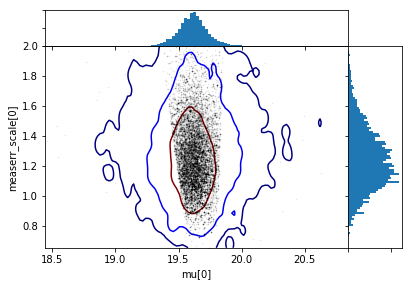

In [35]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


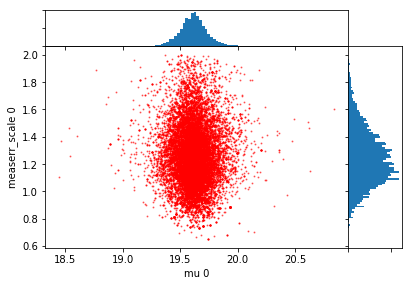

In [36]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


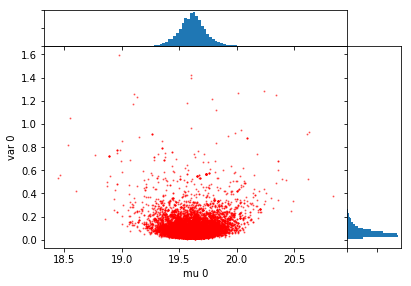

In [37]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


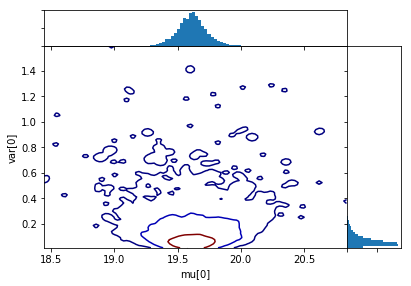

In [38]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

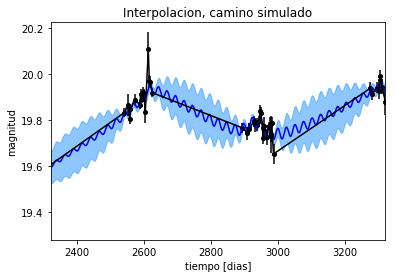

In [39]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

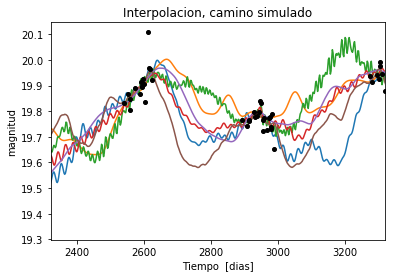

In [40]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')